In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read the dataset:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
## No of records and columns:
df.shape

(1000, 8)

# Data checks to perform:
##1) Check missing values
##2) Check duplicates
##3) Check datatypes
##4) Check the no of unique values of each column
##5) Check statistics of dataset
##6) Check various categories present in the different categorical columns

In [4]:
## To check number of missing values in the dataset:
df.isnull().sum()  ## similar to df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#Insights or Observation
##There is no missing values.

In [5]:
## To find the duplicate records:
df.duplicated().sum()

0

#Insights or Observation
##There is no duplicate values.

In [6]:
## Check datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
## Check the number of unique values in each column:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
## Check the statistics of the dataset:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##Insights or Observation
- All means are close to each other-between 66 and 69
- All standard deviation are close to each other-between 14.6 and 15.19
- While there is minimum of 0 for maths, others are having 17 and 10 values

In [9]:
## Explore more info about the data:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
## Seggregate numerical and categorical features:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(numerical_features)
print(categorical_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
## Aggregate the total score with the mean:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


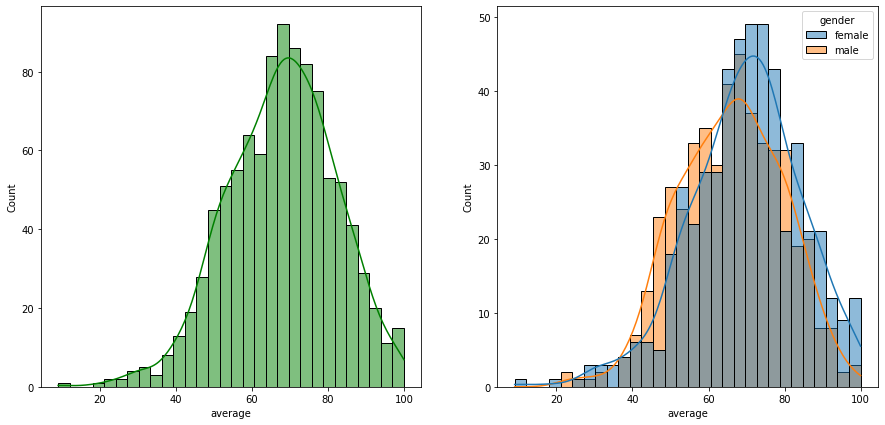

In [12]:
## Explore more visualization:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

##Insights or observation
- Female students tend to perform well than male students

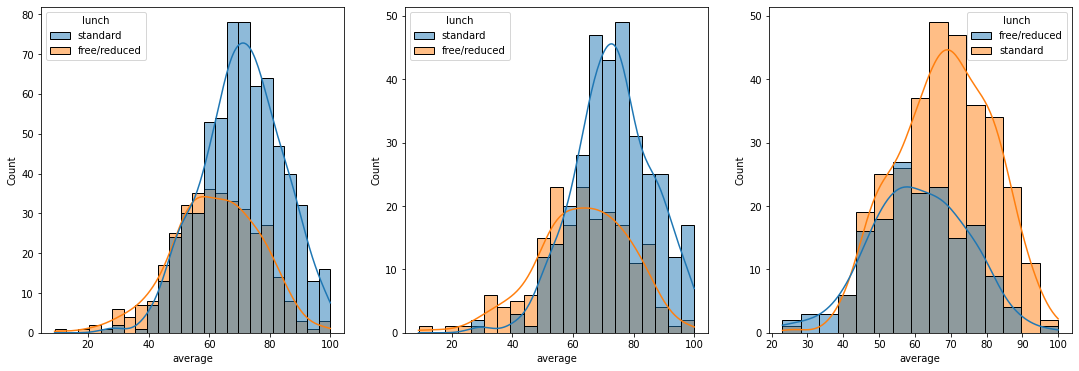

In [13]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(1,4,2)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.show()

##Insights or observation
- Standard lunch helps students to perform well in exams
- Standard lunch helps students to perform well in exams for both male and female

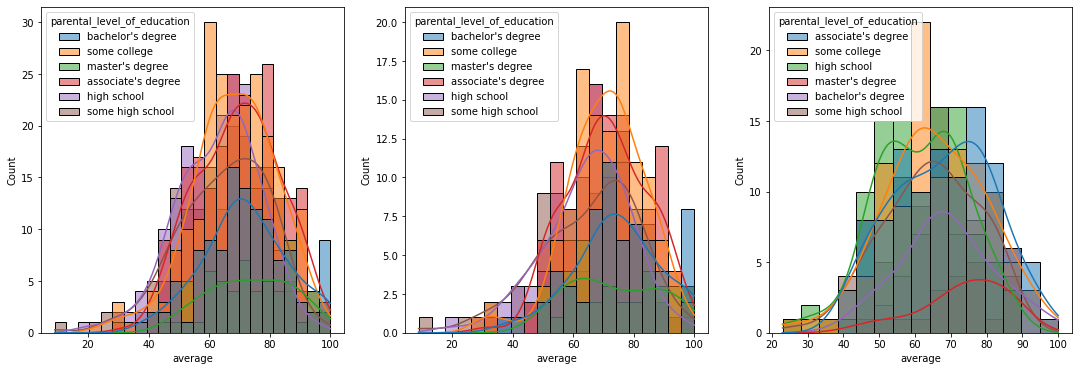

In [14]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(1,4,2)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(1,4,3)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

##Insights or observation
- In general parent's education does not help students to perform well in exam.
- 2nd plot there is no effect of parent's education in female students.
- 3rd plot shows that parent's education who is of associate or master's degree, their male child tends to perform well.

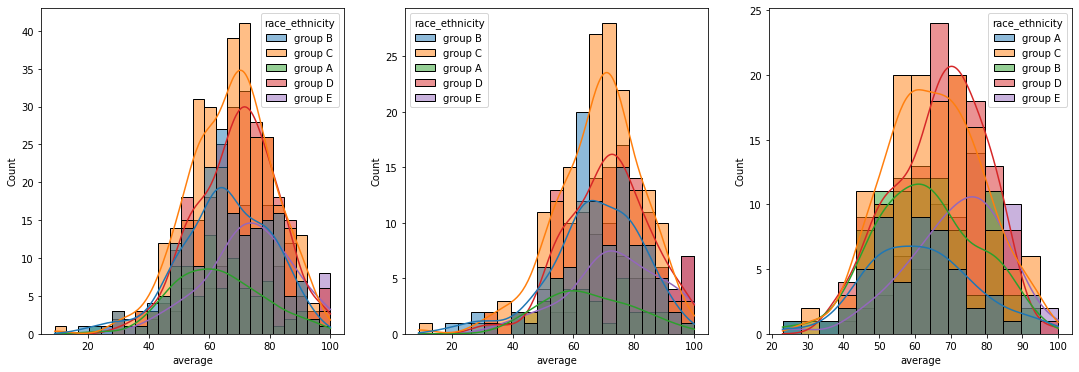

In [15]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(1,4,2)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(1,4,3)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

##Insights or Observation
- Students of group A and group Btends to perform poorly in exam.
- Students of group A and group Btends to perform poorly in exam irrespective of whether they are male or female.

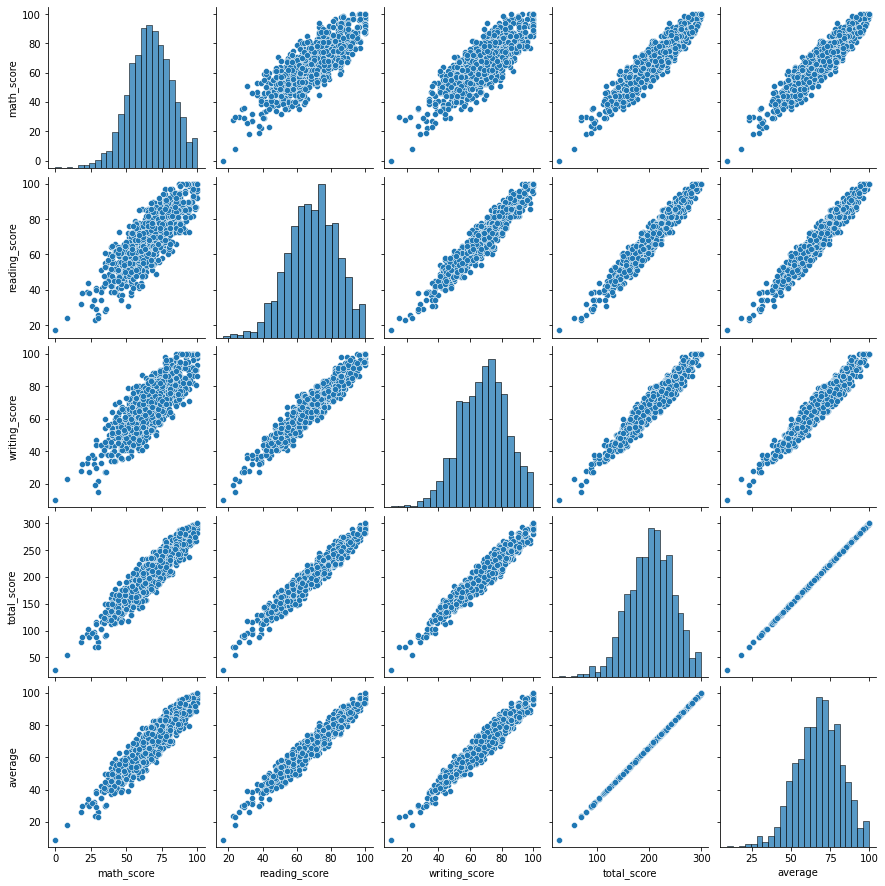

In [16]:
## Visualizing Pair plot:
sns.pairplot(data=df)

<Axes: >

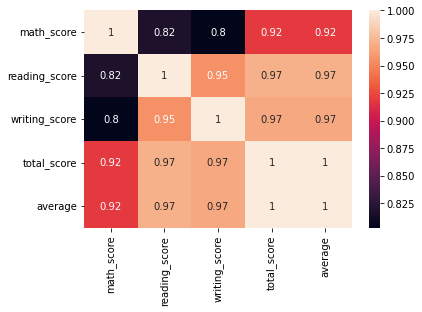

In [17]:
## Visualizing correlation:
sns.heatmap(df.corr(),annot=True)